In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [49]:
# 1. Carregar os dados principais
df = pd.read_csv('../../Bases/Criados/base_doencas_cardiacas.csv')

df.head()

,V0026,V0031,B001,C006,C008,C009,C011,D00201,D00301,D008,...,Q067,Q068,Q11006,Q128,T001,H001,H002,H003,H004,H010
0,1,1,1.0,1.0,81.0,4.0,3.0,2.0,NaN,2.0,...,NaN,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN
1,1,1,2.0,2.0,54.0,4.0,3.0,2.0,NaN,1.0,...,NaN,2.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN
2,1,1,2.0,2.0,41.0,2.0,1.0,2.0,NaN,1.0,...,NaN,2.0,2.0,2.0,2.0,3.0,1.0,NaN,NaN,NaN
3,1,1,2.0,1.0,62.0,1.0,2.0,2.0,NaN,1.0,...,NaN,2.0,2.0,2.0,2.0,3.0,1.0,NaN,NaN,NaN
4,1,1,2.0,2.0,51.0,4.0,1.0,2.0,NaN,1.0,...,NaN,2.0,2.0,1.0,2.0,4.0,NaN,NaN,NaN,NaN


Colunas com outliers: ['C008', 'C009', 'D00201', 'D008', 'E002', 'E003', 'E004', 'E005', 'E011', 'E014011', 'E01605', 'E01602', 'E01604', 'E017', 'E01802', 'E01804', 'E019', 'F007011', 'F008011', 'VDF001', 'G059', 'G060', 'G062', 'I00102', 'I00103', 'I001031', 'C00301', 'I006', 'I00401', 'I00402', 'I00403', 'J001', 'J00101', 'J002', 'J00404', 'J01101', 'M00203', 'M011011', 'M011021', 'M011051', 'M011071', 'N00101', 'N004', 'N005', 'N008', 'N010', 'N011', 'N012', 'N016', 'P00103', 'P00104', 'P00403', 'P00404', 'P02001', 'P02002', 'P02501', 'P02602', 'P02601', 'P02801', 'P029', 'P03701', 'P050', 'P053', 'P05407', 'P05410', 'P05413', 'P05416', 'P05419', 'P05901', 'P05902', 'P05903', 'P05904', 'P06701', 'P068', 'Q00101', 'Q03001', 'Q060', 'Q06306', 'Q06308', 'Q06309', 'Q06311', 'Q064', 'Q06508', 'Q068', 'Q11006', 'Q128', 'T001']


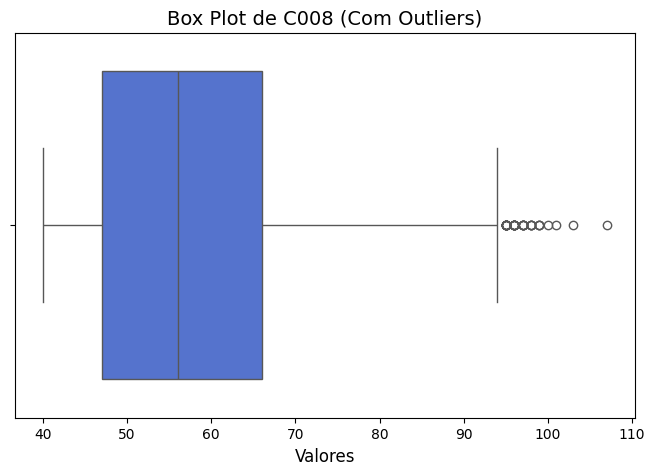

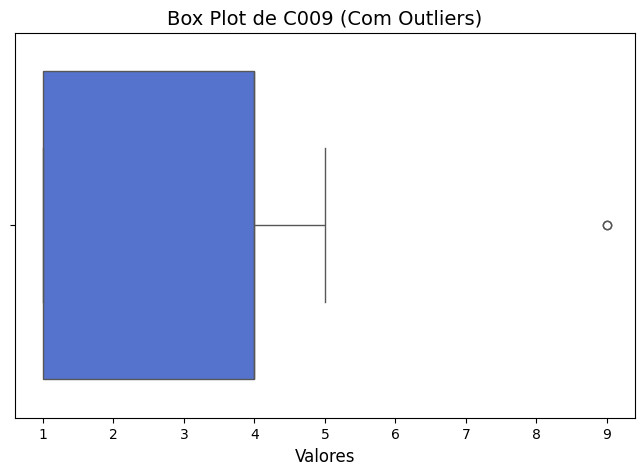

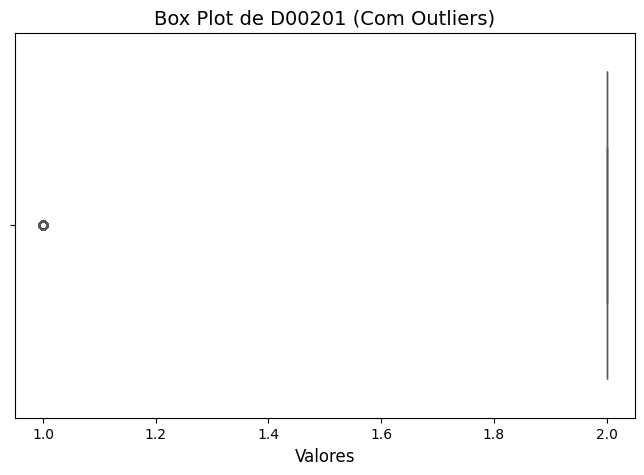

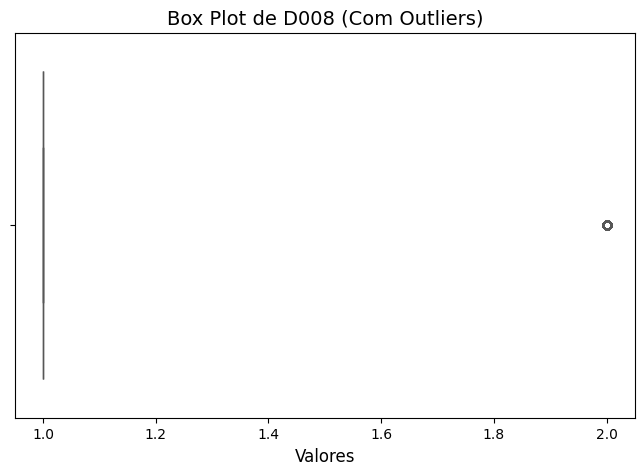

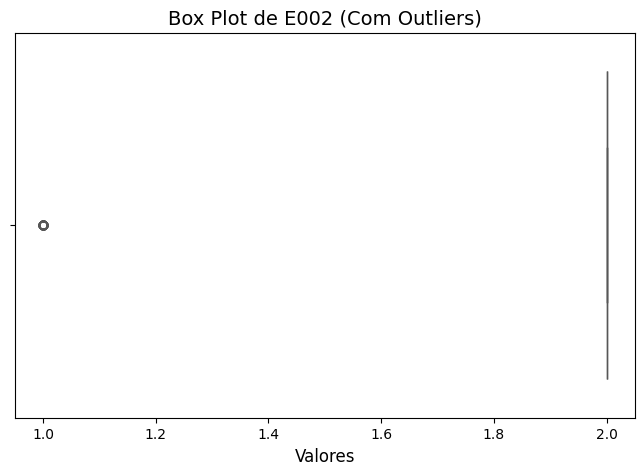

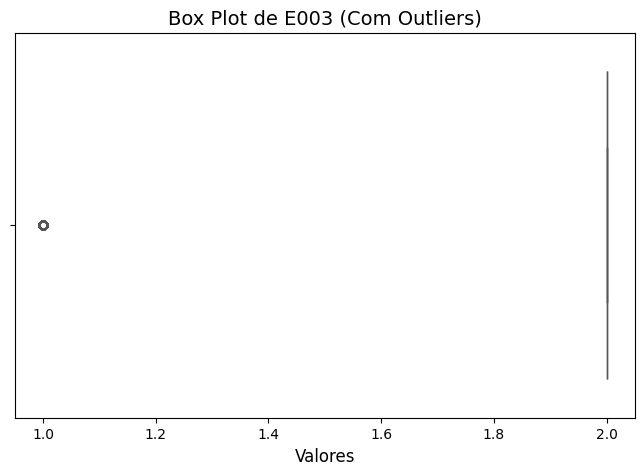

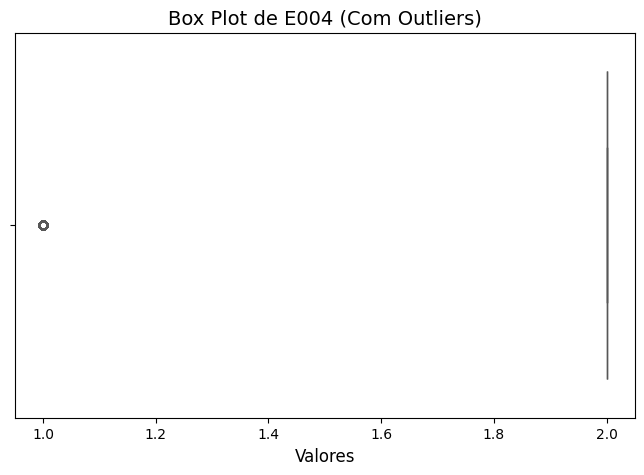

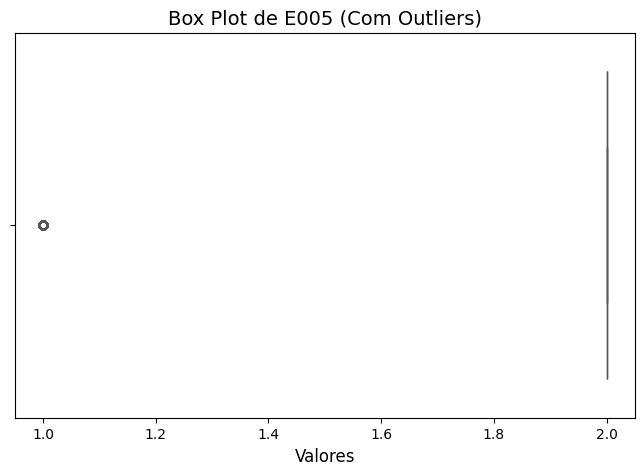

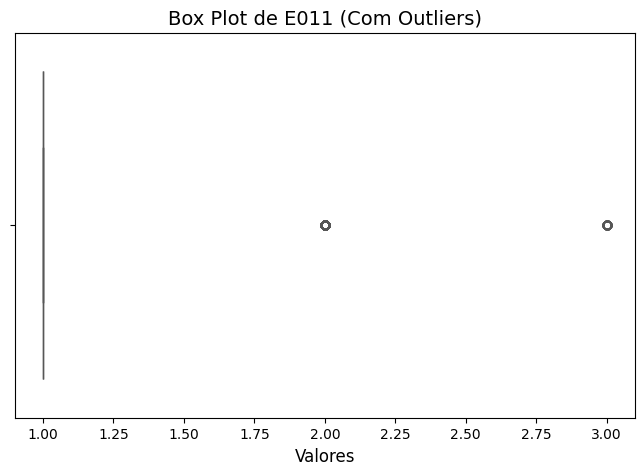

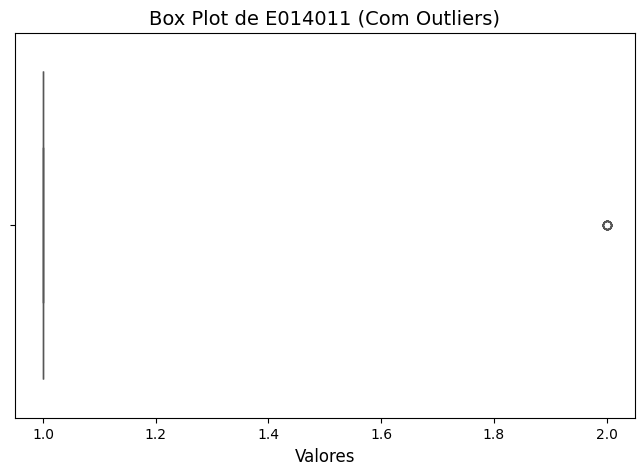

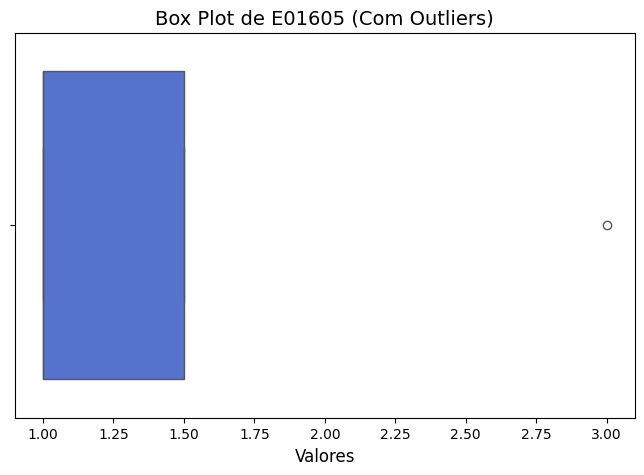

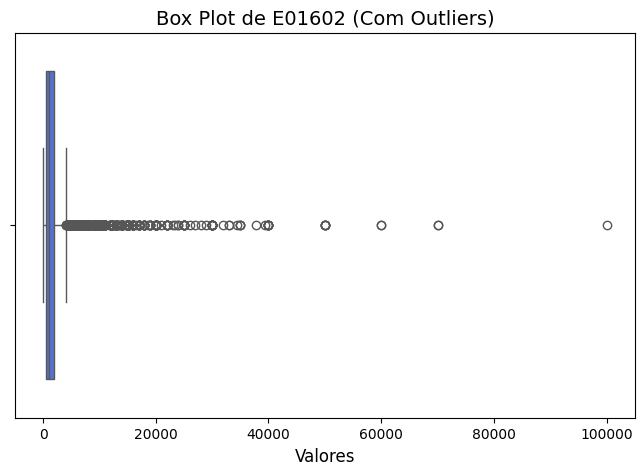

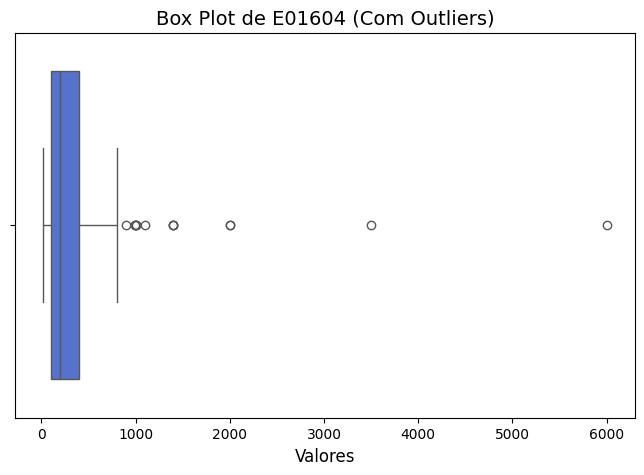

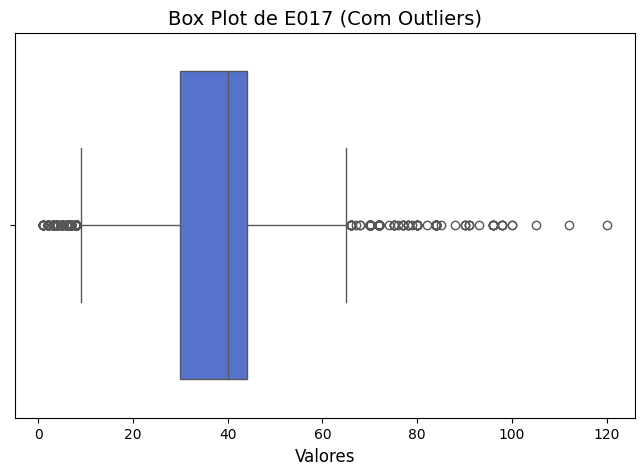

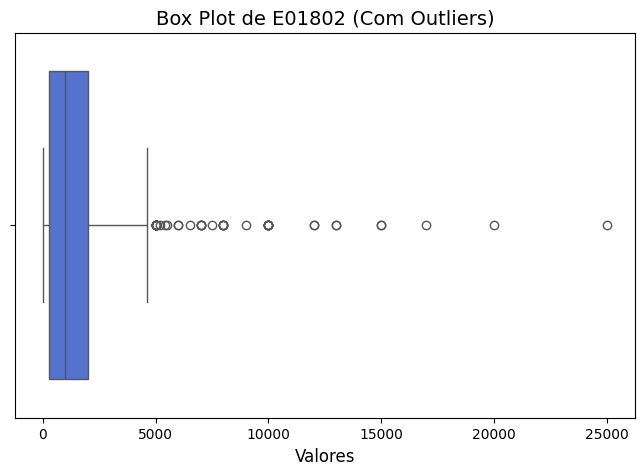

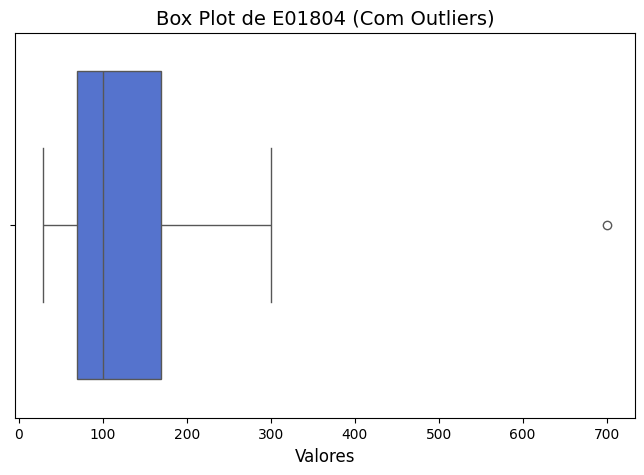

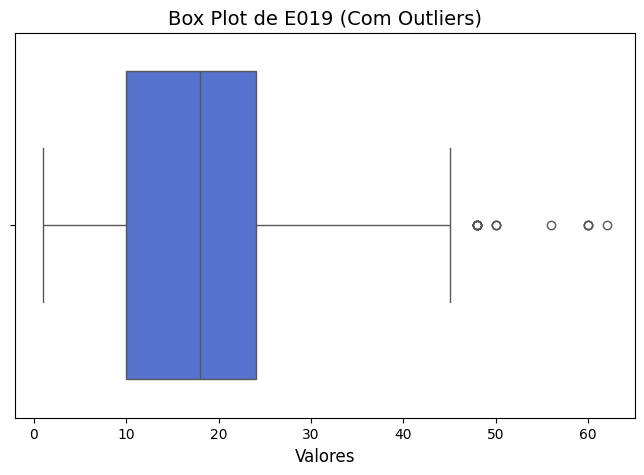

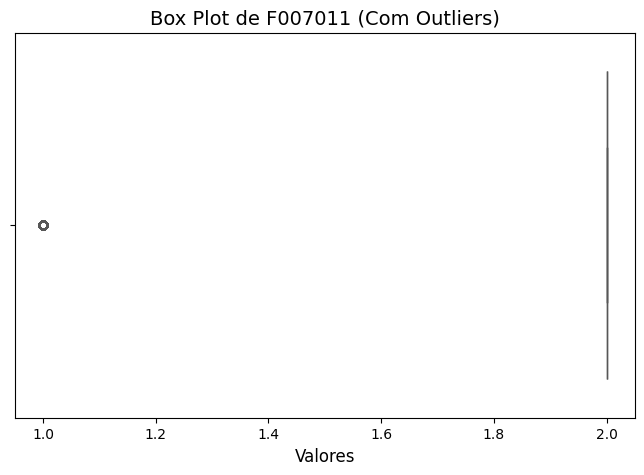

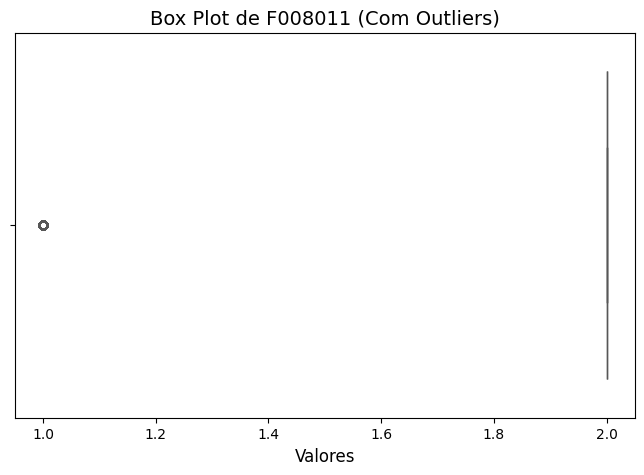

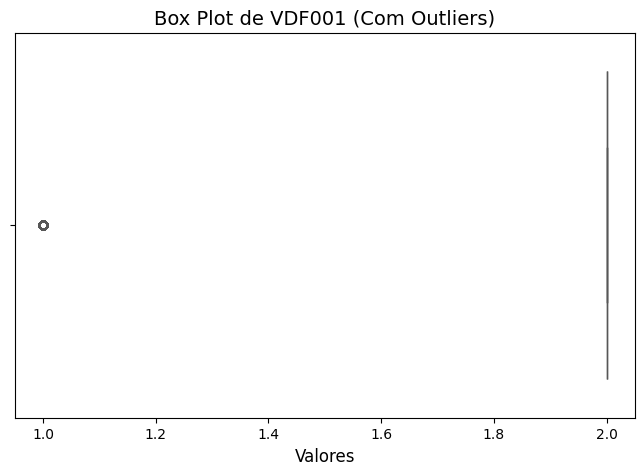

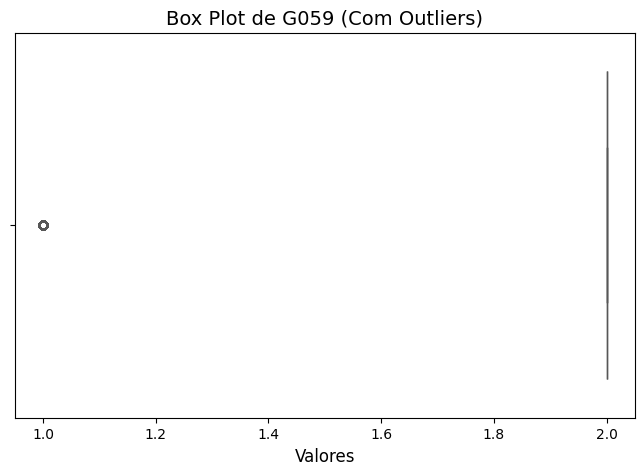

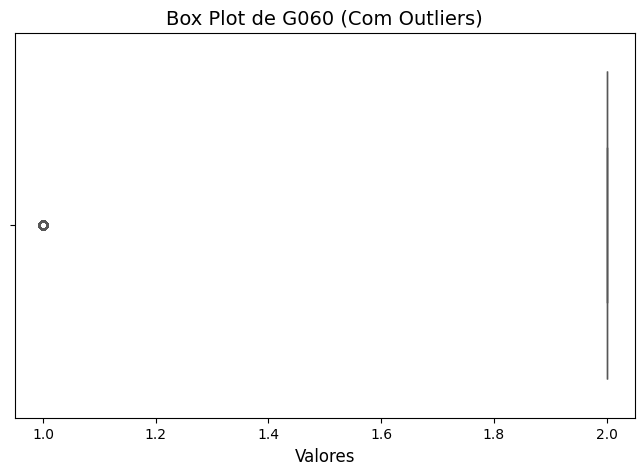

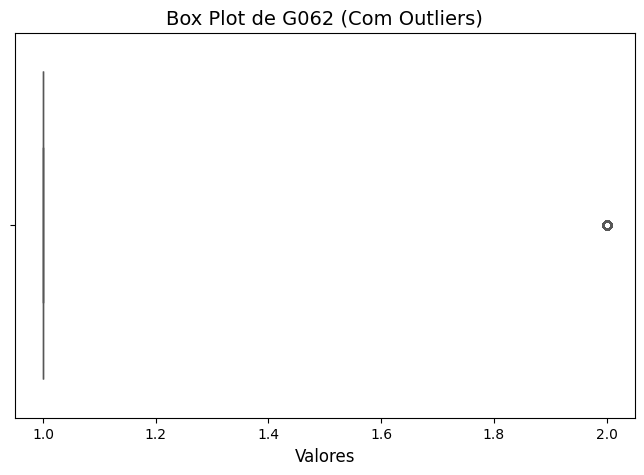

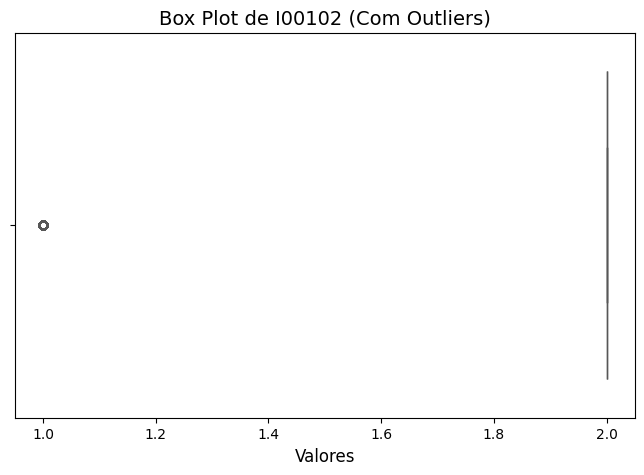

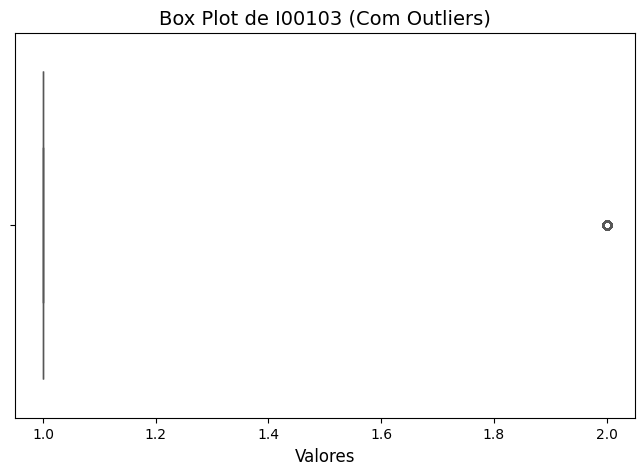

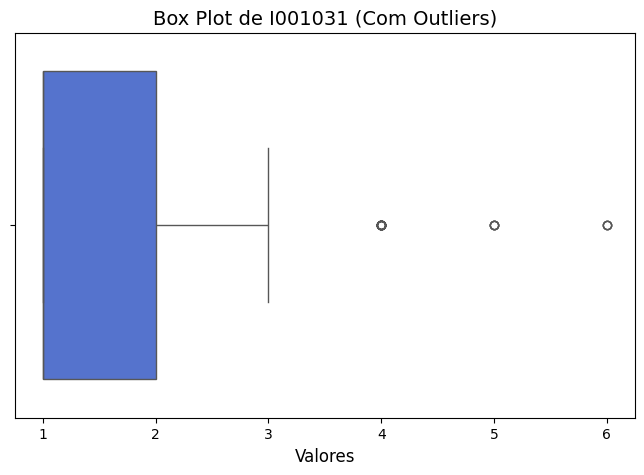

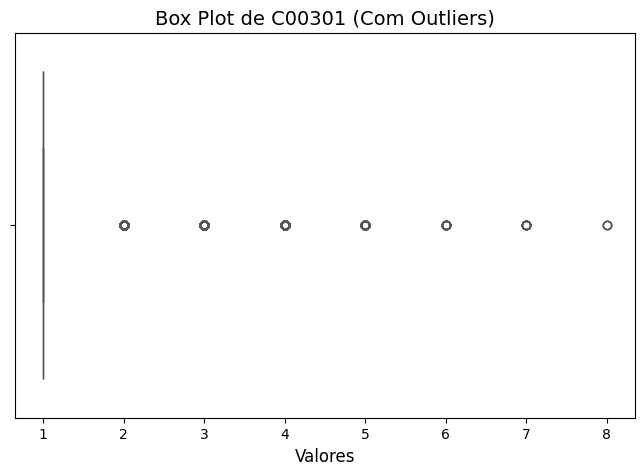

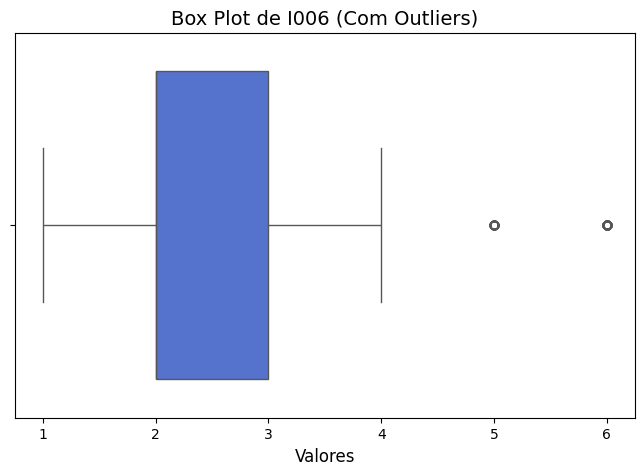

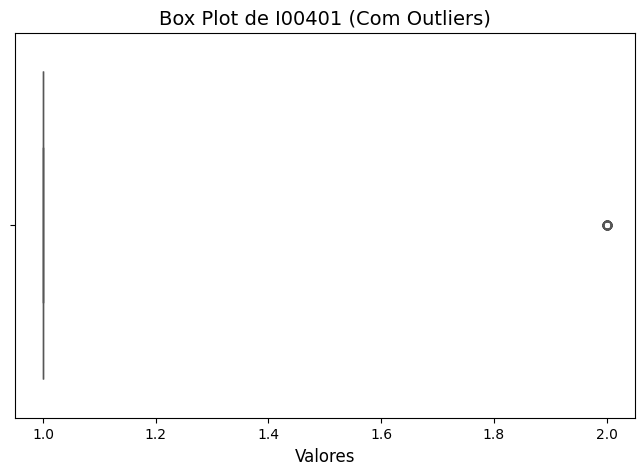

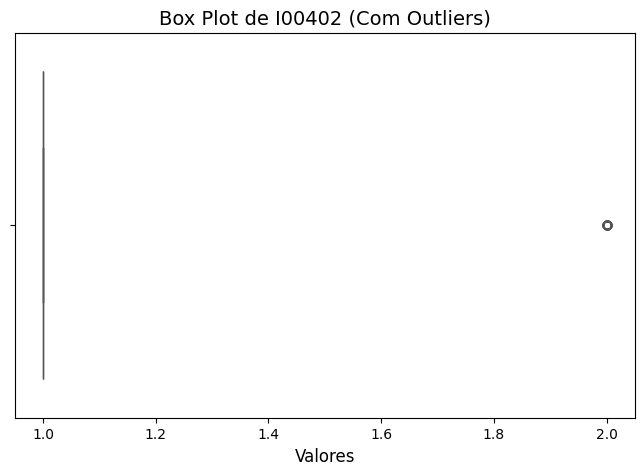

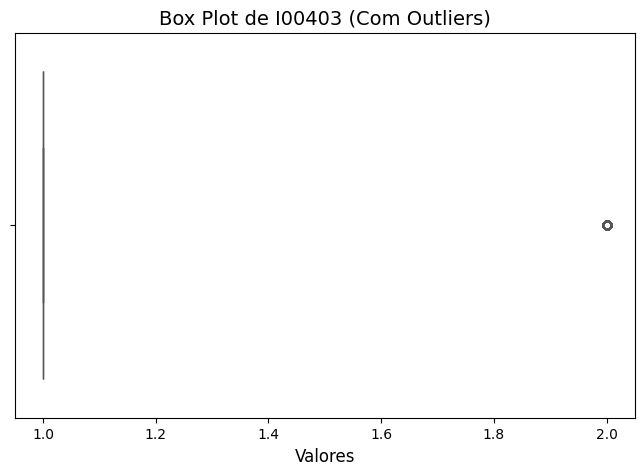

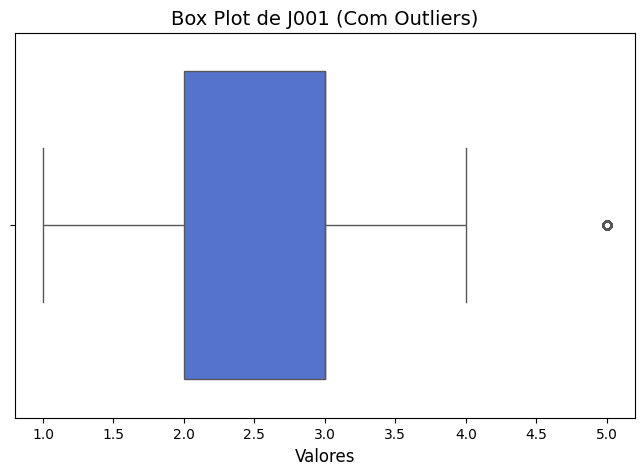

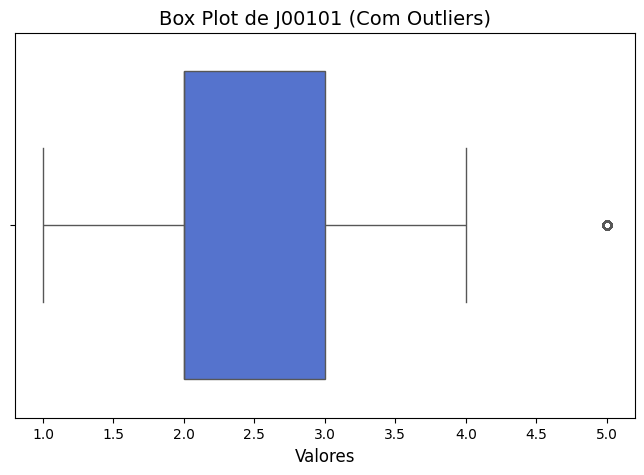

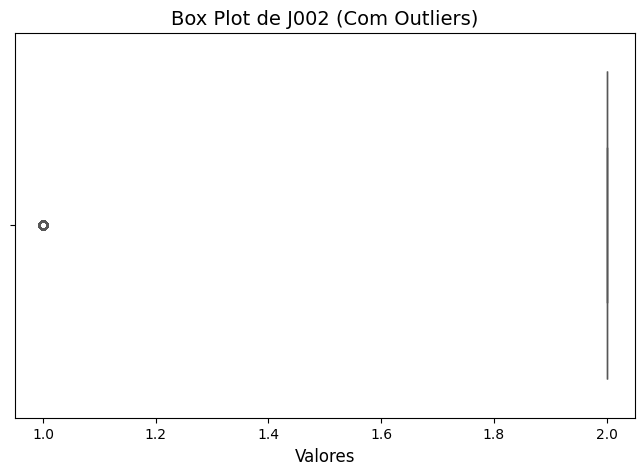

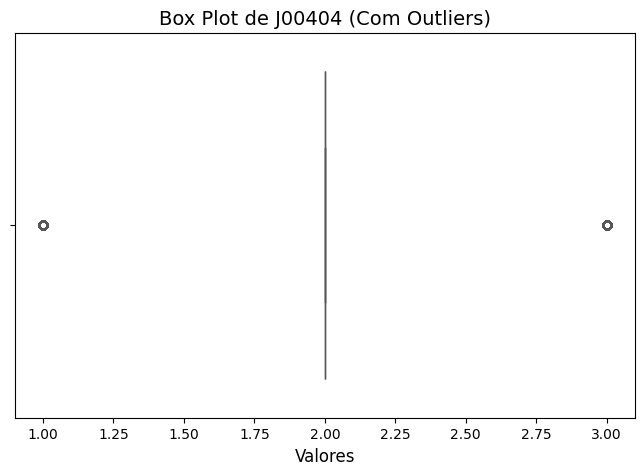

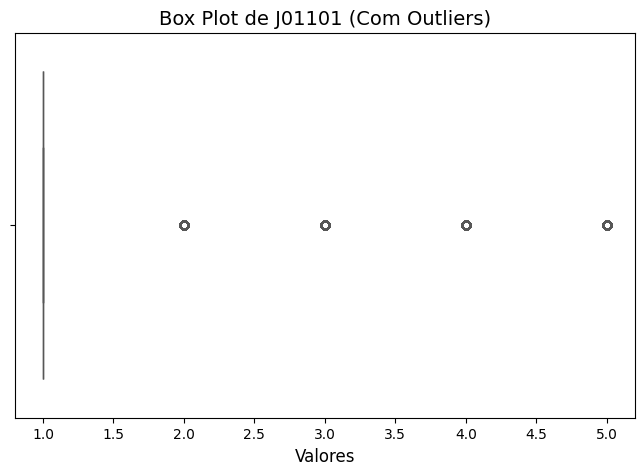

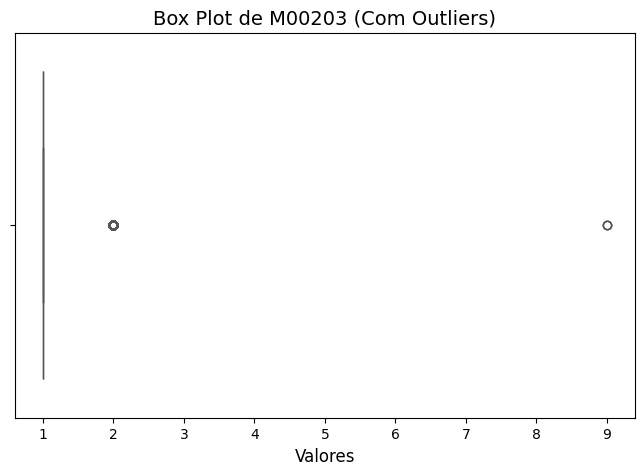

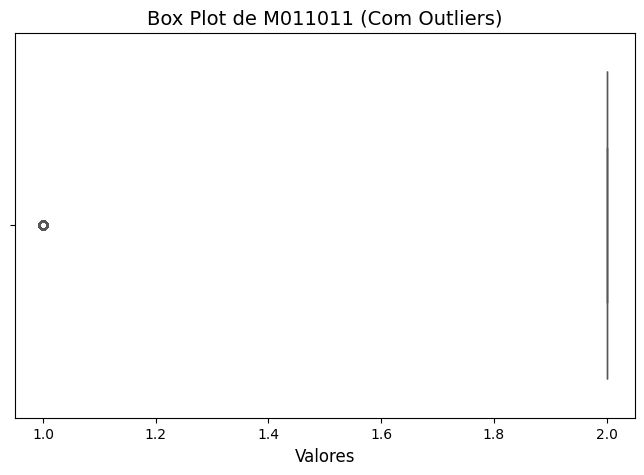

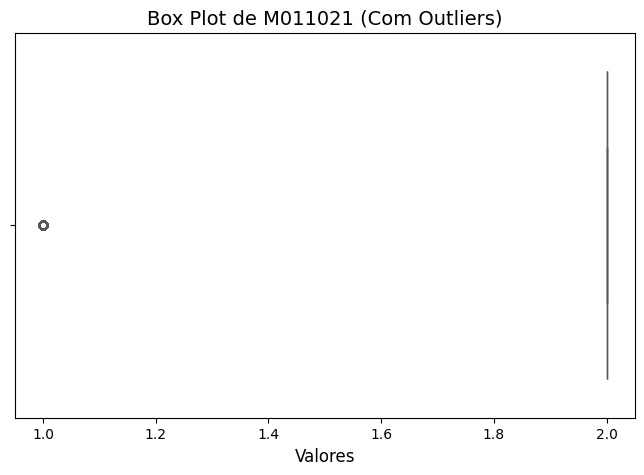

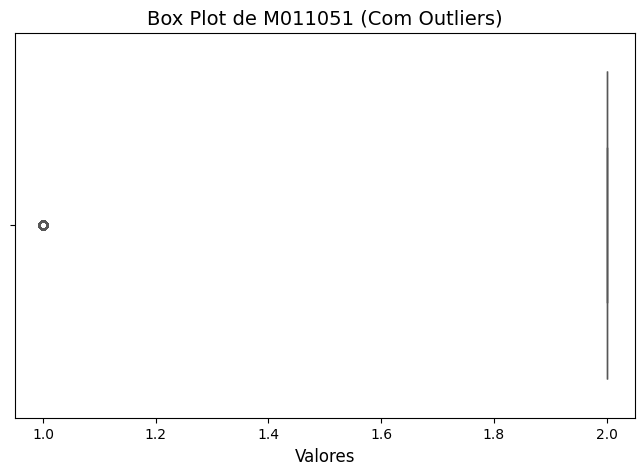

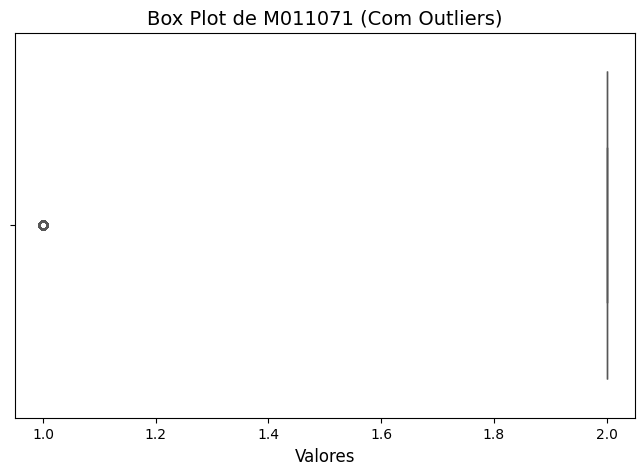

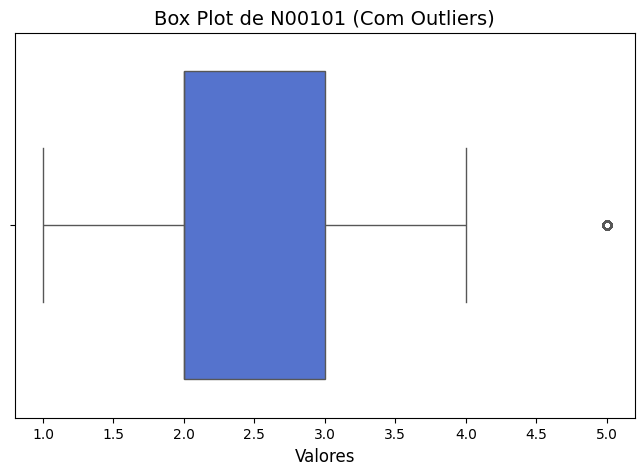

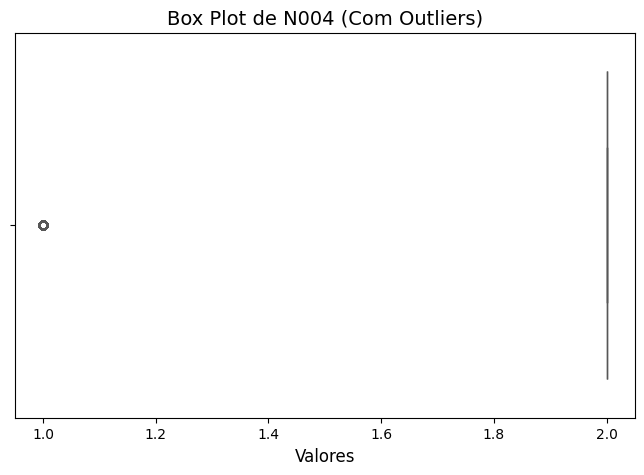

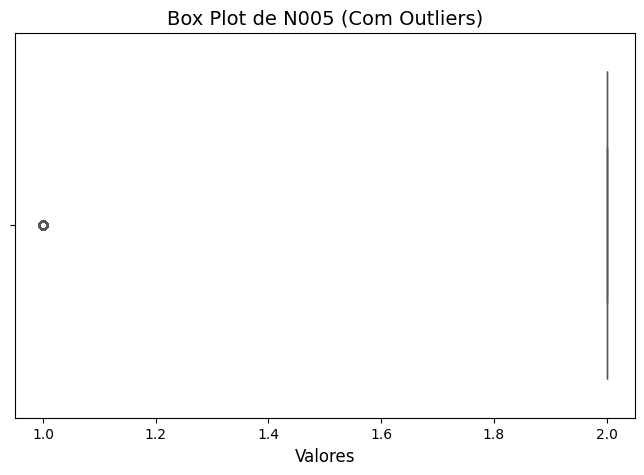

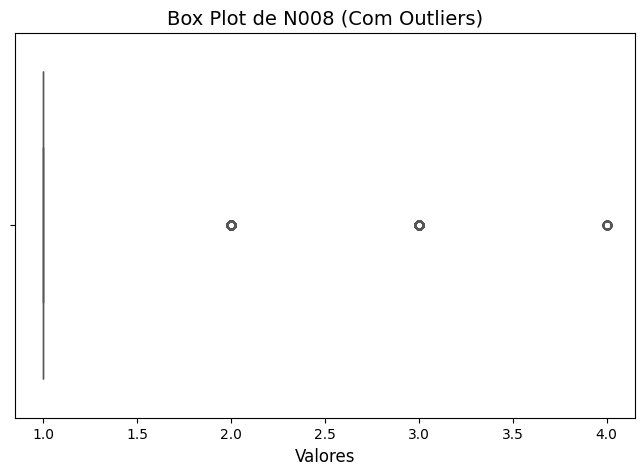

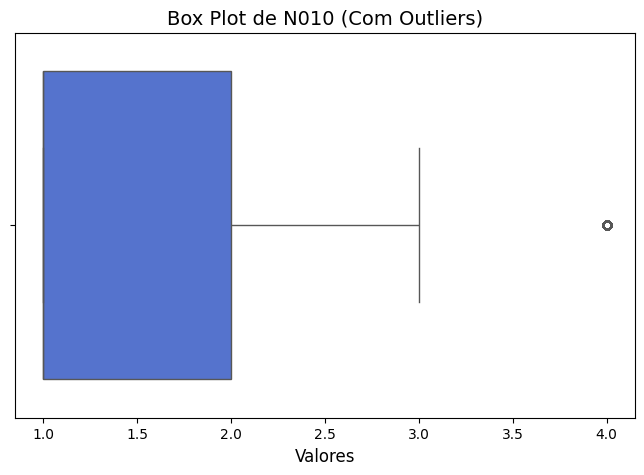

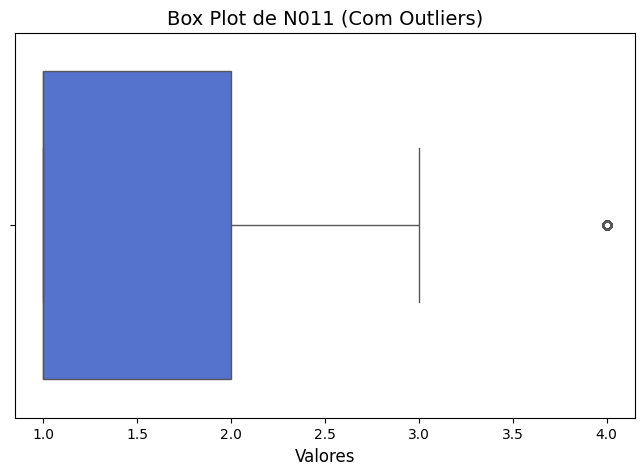

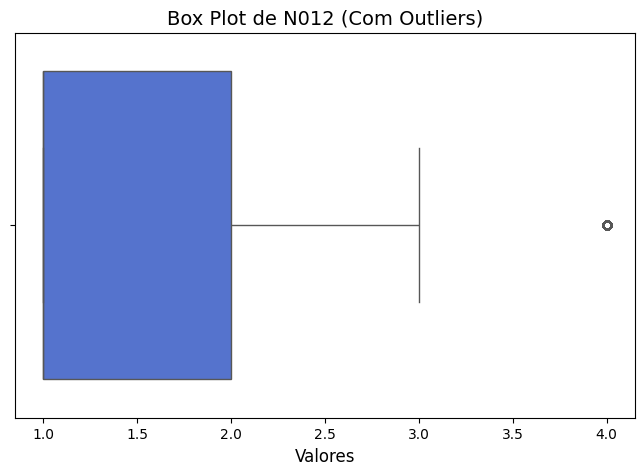

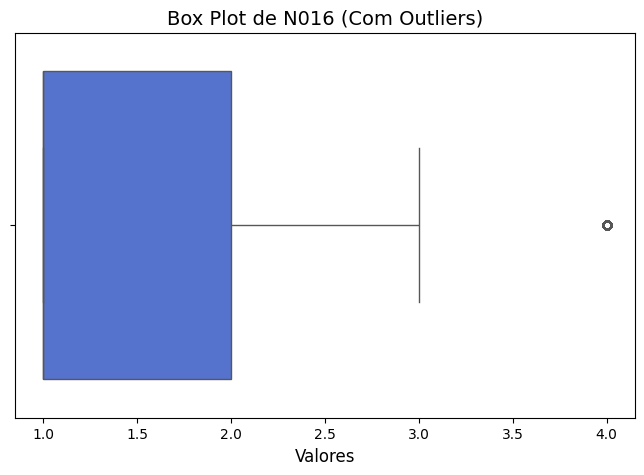

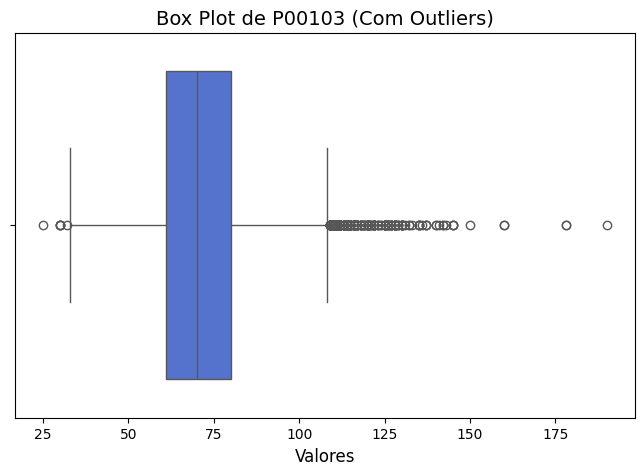

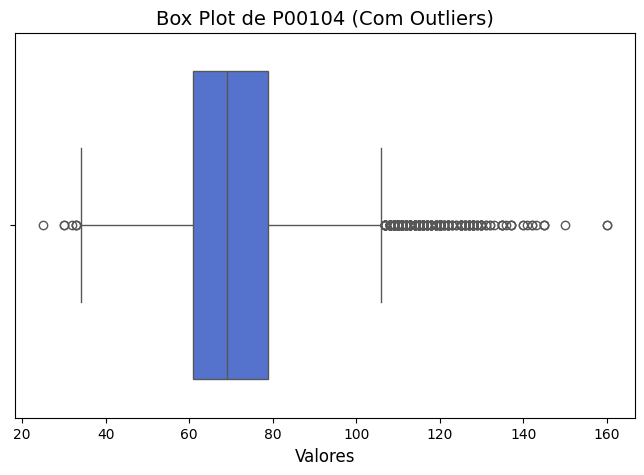

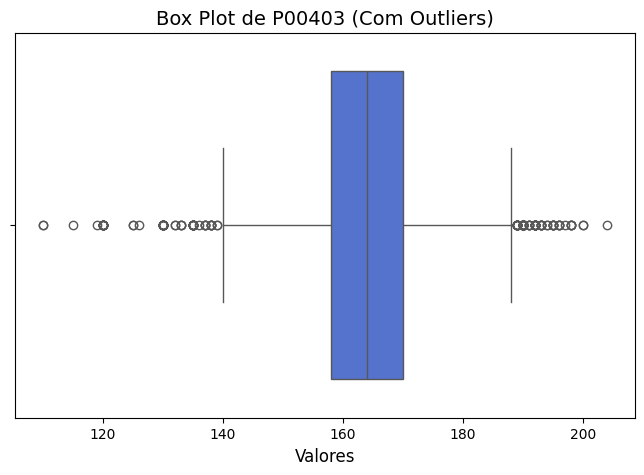

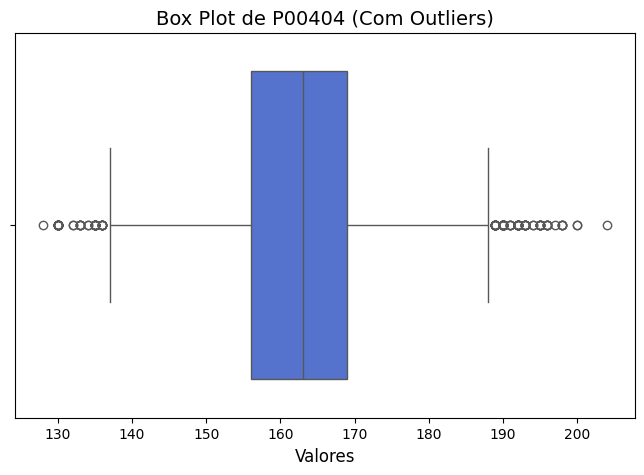

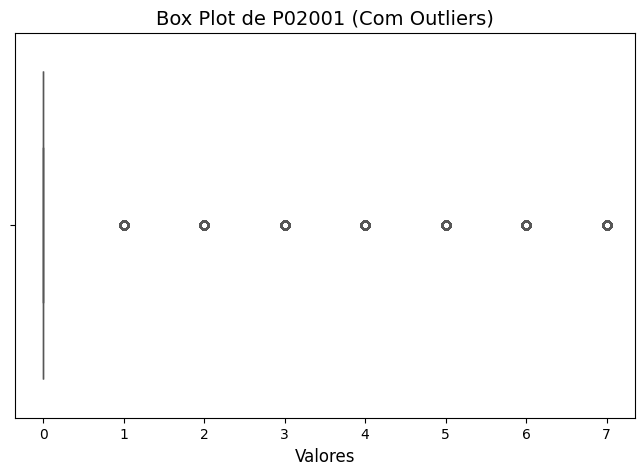

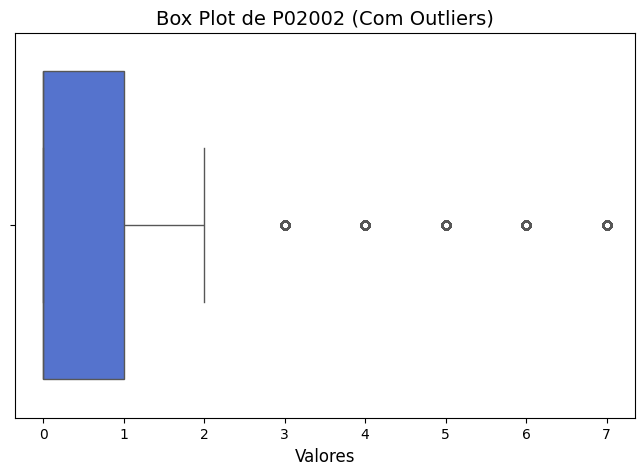

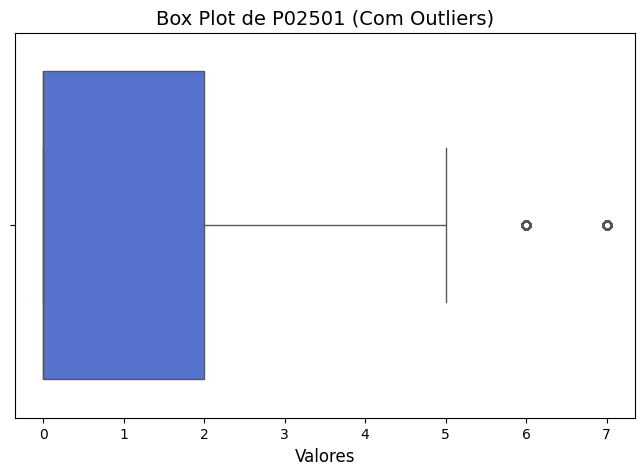

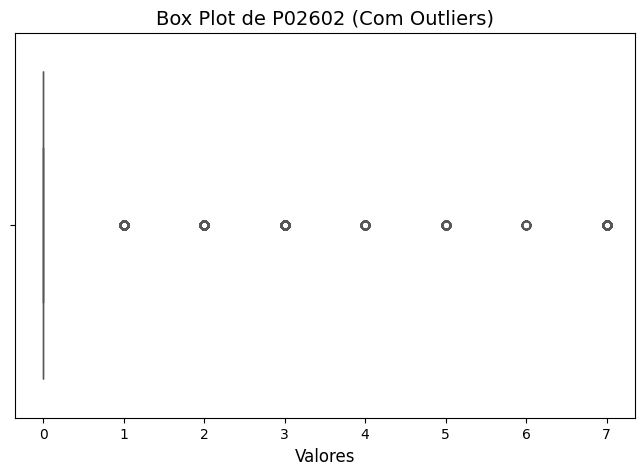

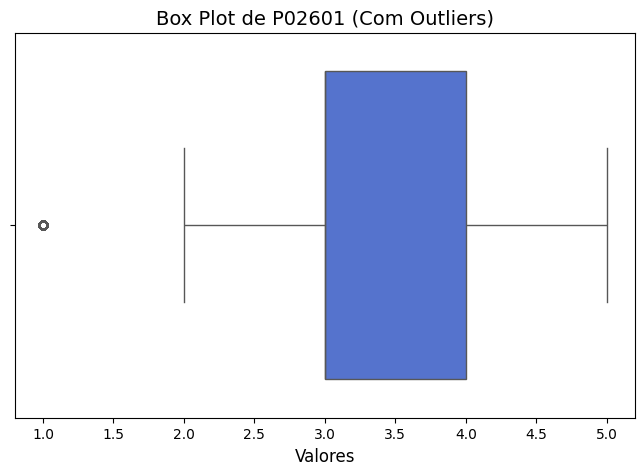

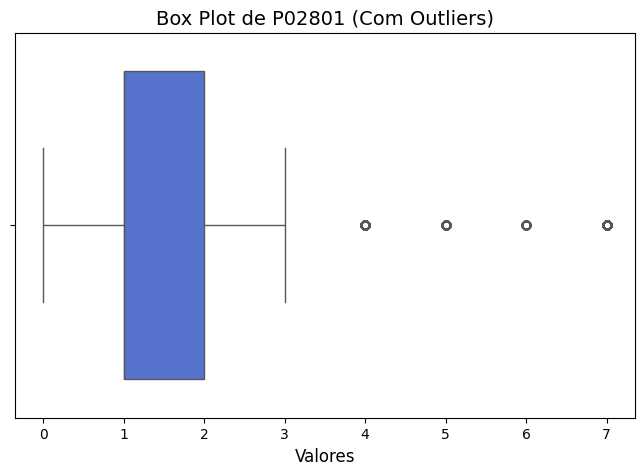

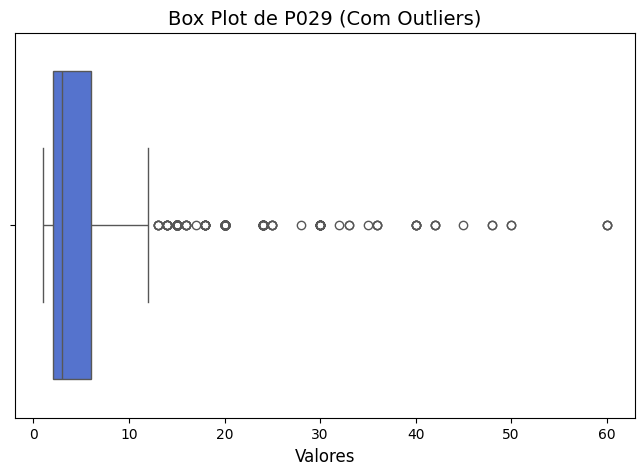

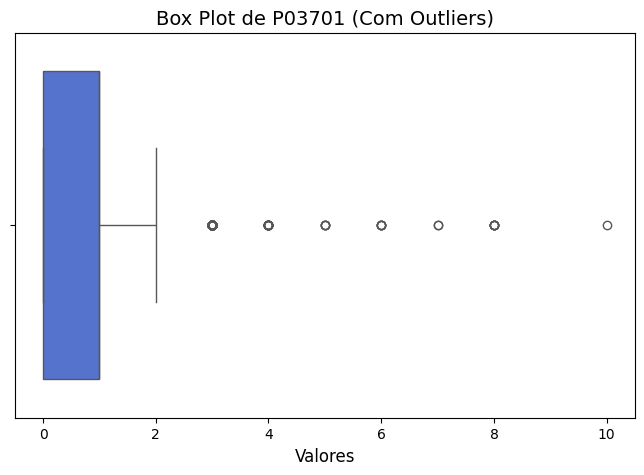

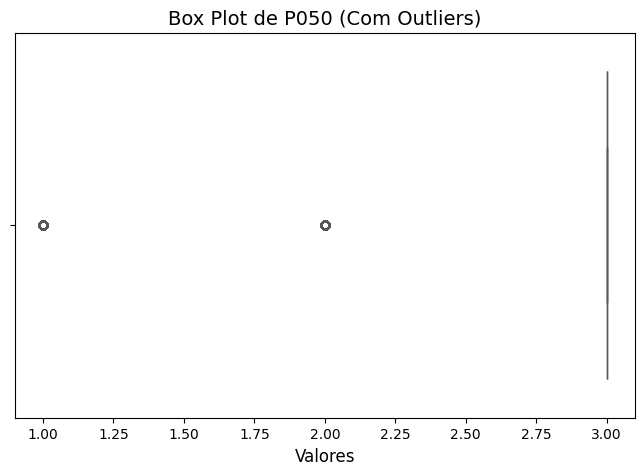

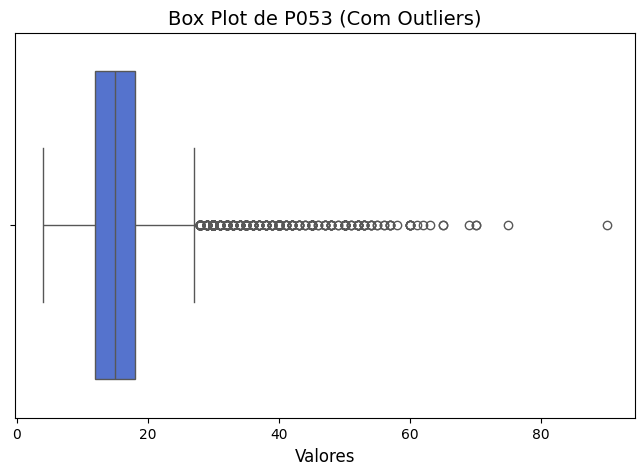

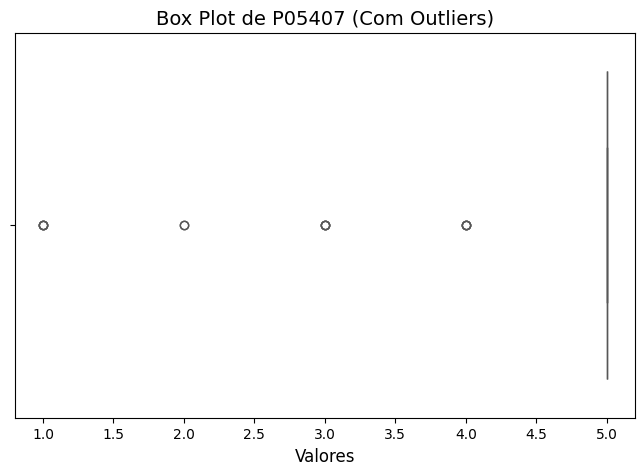

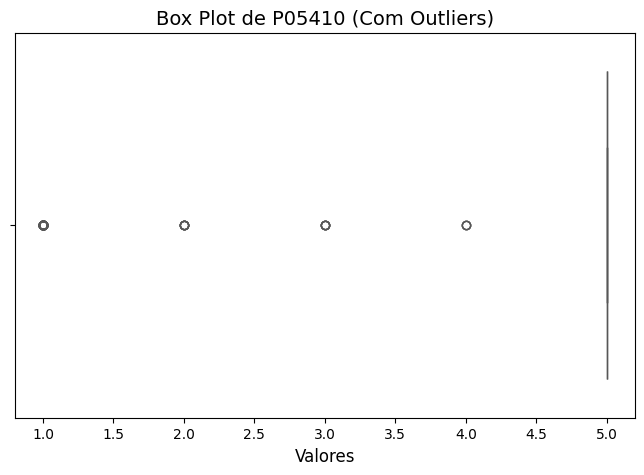

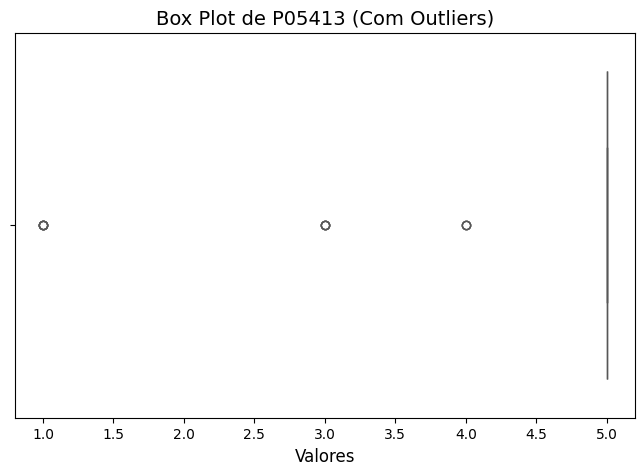

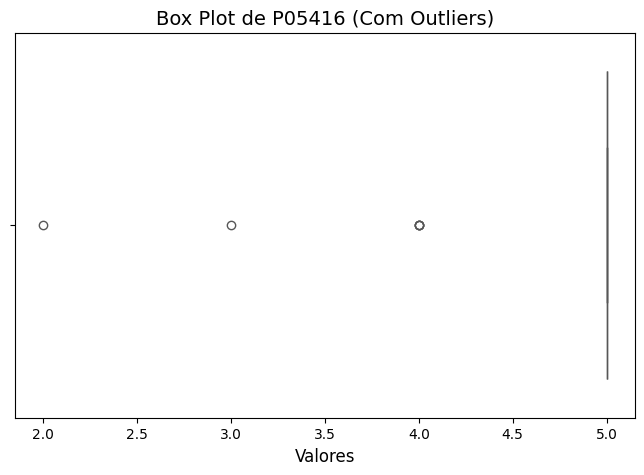

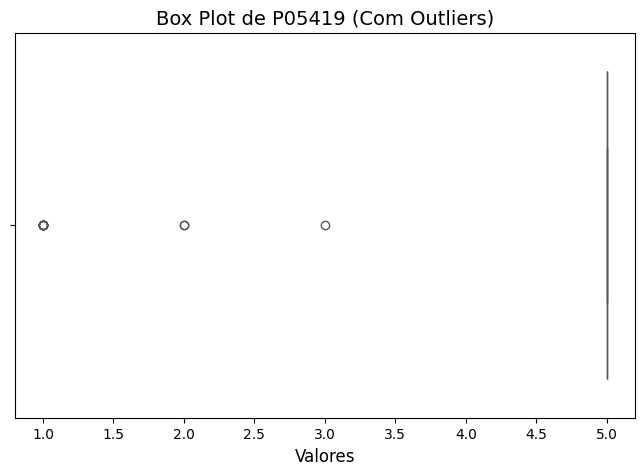

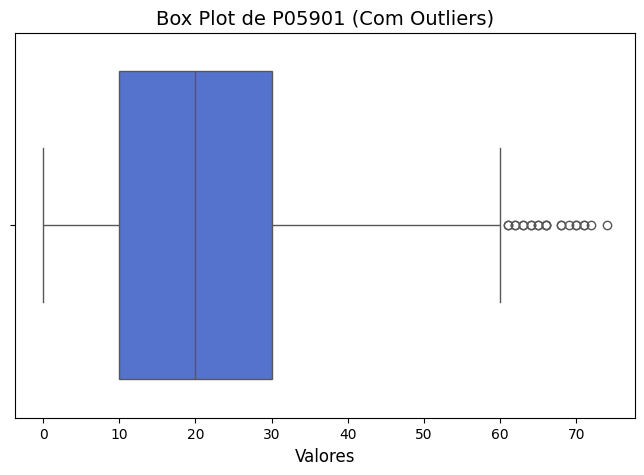

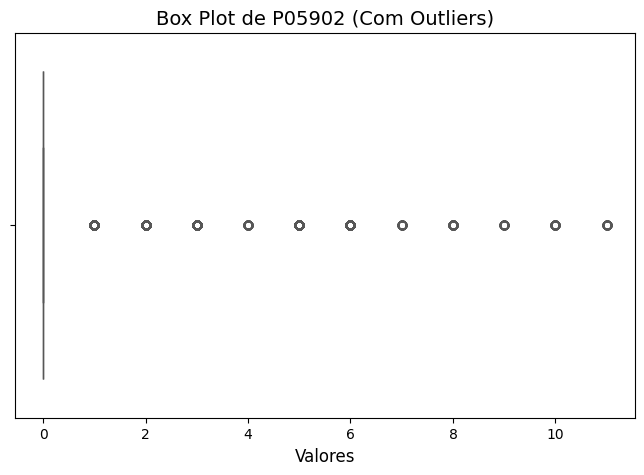

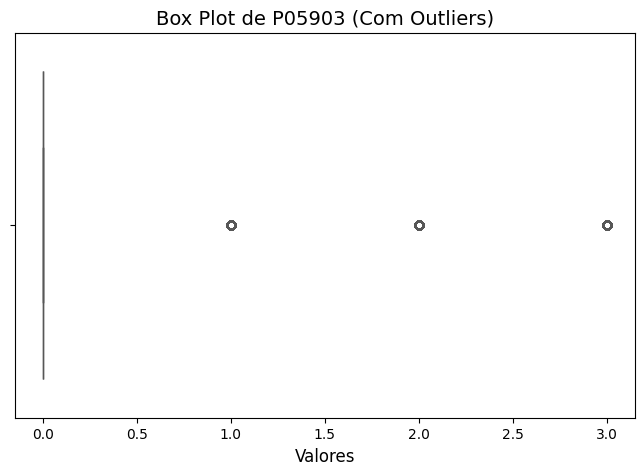

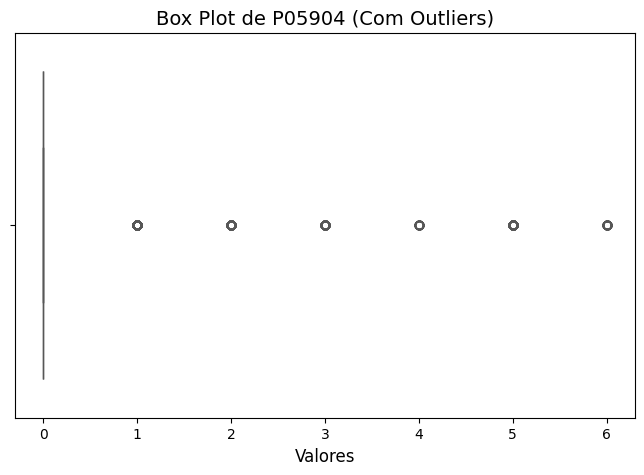

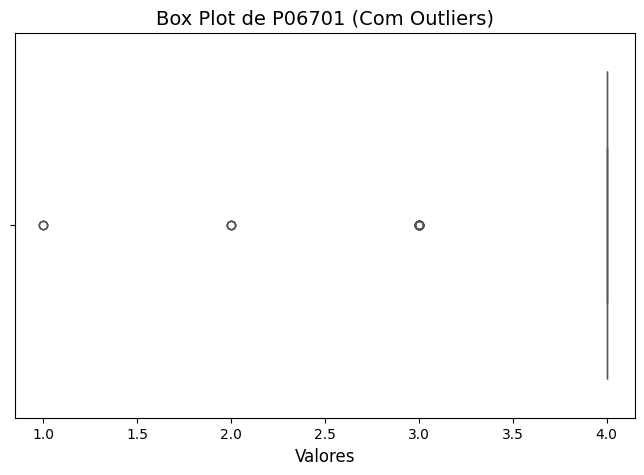

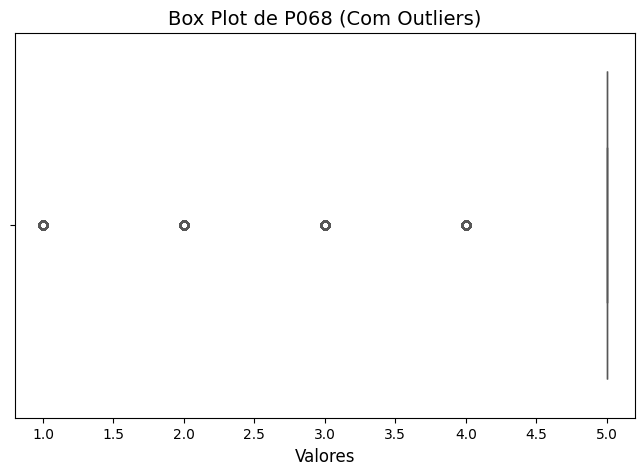

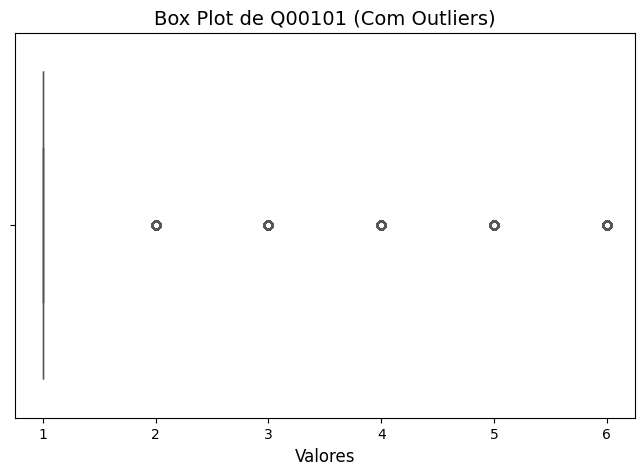

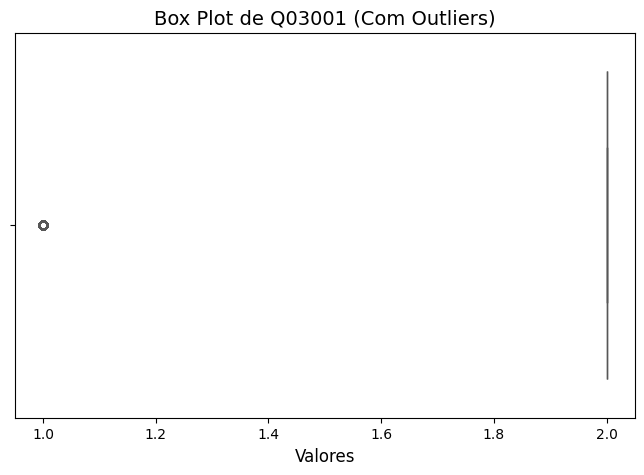

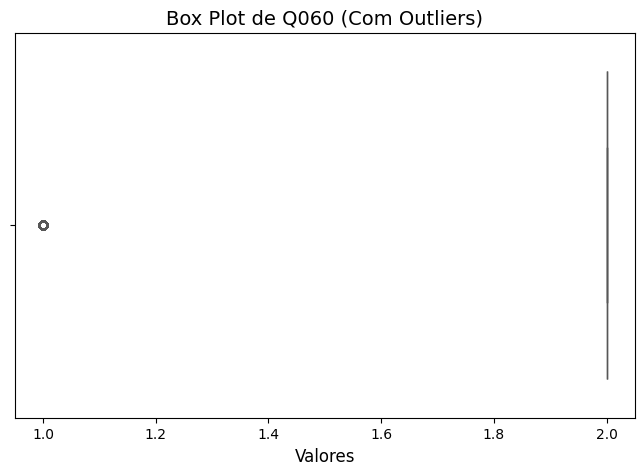

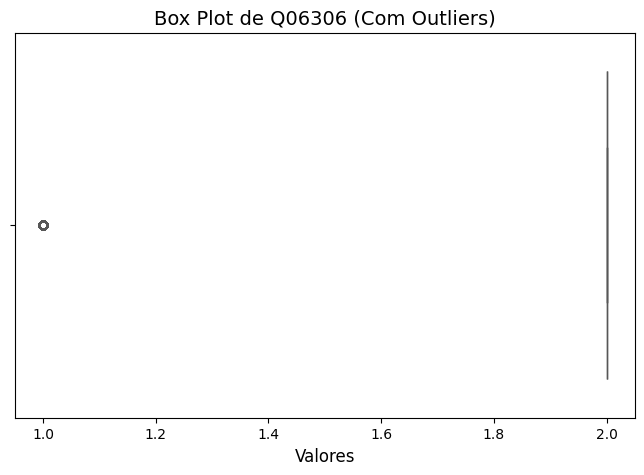

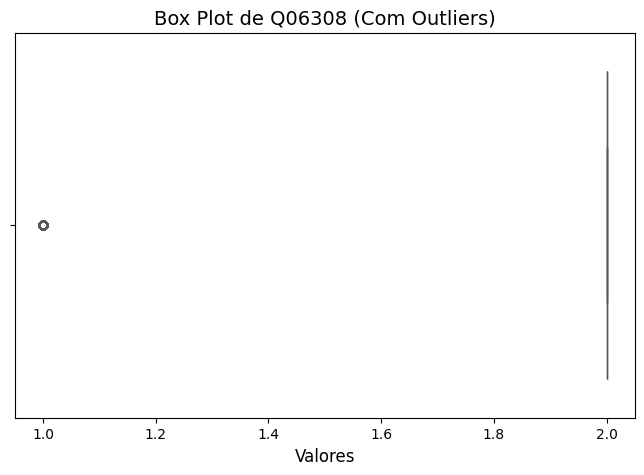

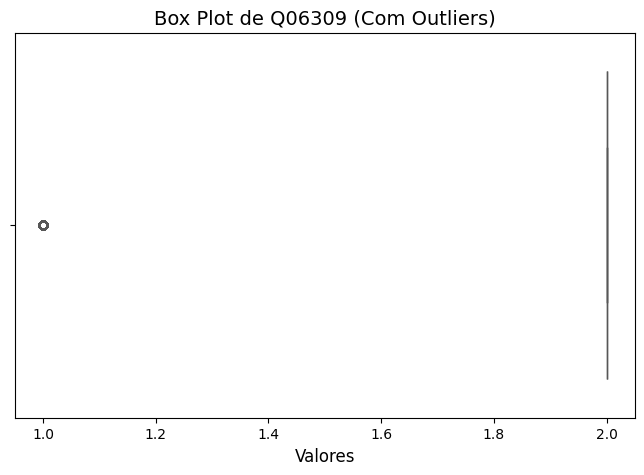

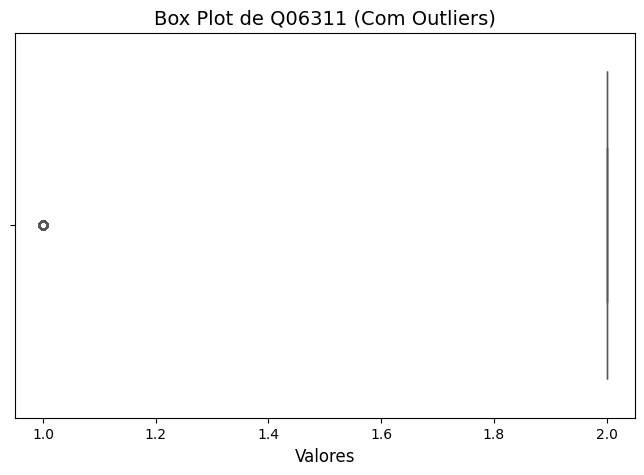

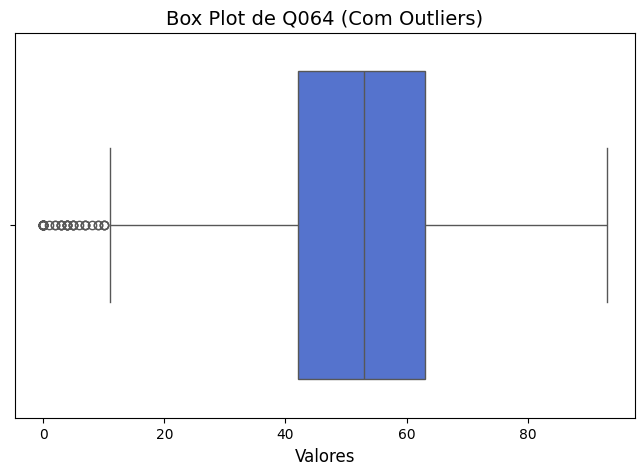

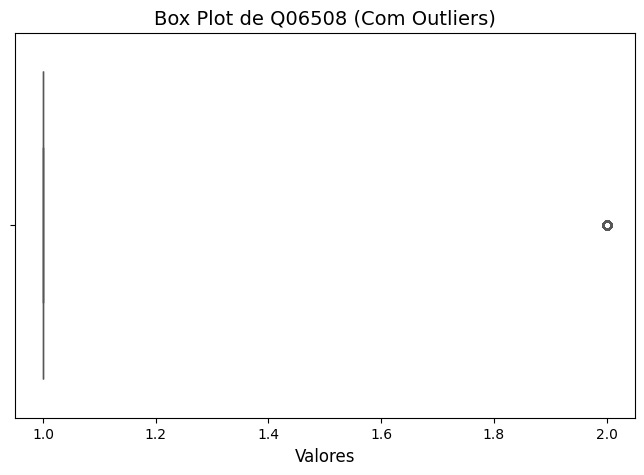

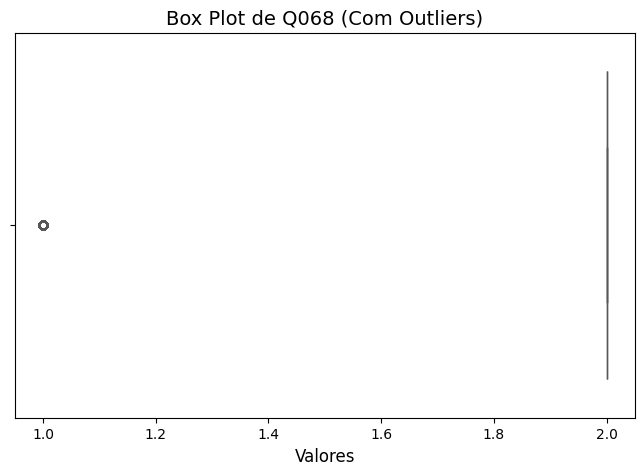

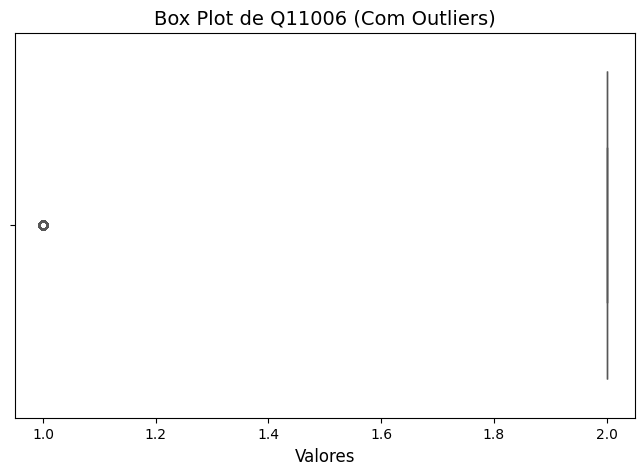

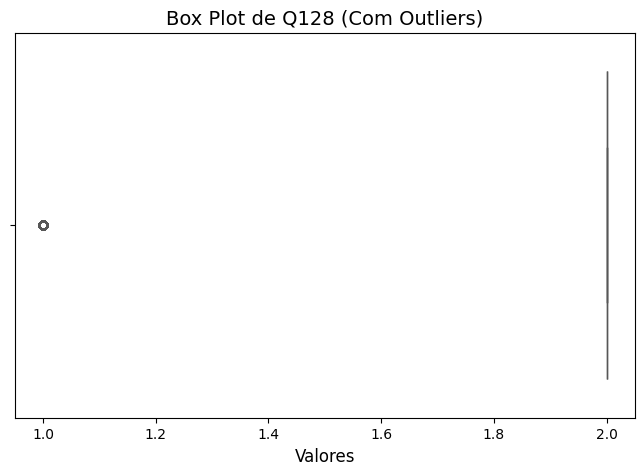

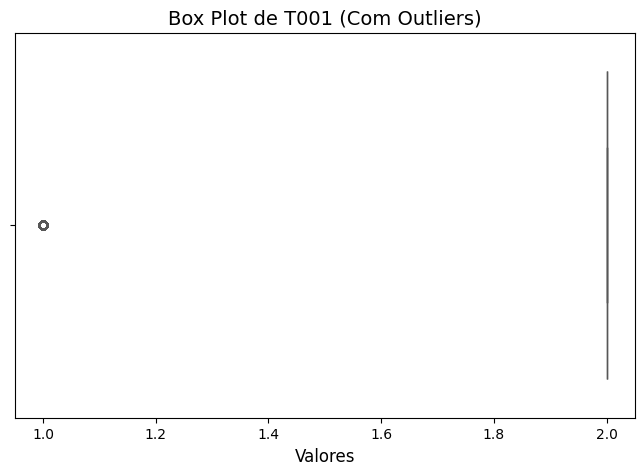

Gráficos salvos na pasta 'Imagens'!


In [50]:
# Selecionar colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Criar a pasta 'Imagens' se não existir
os.makedirs('Imagens', exist_ok=True)

# Função para detectar outliers em uma coluna
def tem_outliers(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return any((serie < limite_inferior) | (serie > limite_superior))

# Filtrar colunas que têm outliers
colunas_com_outliers = [col for col in colunas_numericas if tem_outliers(df[col])]

print(f"Colunas com outliers: {colunas_com_outliers}")

# Gerar e salvar box plots apenas para colunas com outliers
for coluna in colunas_com_outliers:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=coluna, color='royalblue')
    plt.title(f'Box Plot de {coluna} (Com Outliers)', fontsize=14)
    plt.xlabel('Valores', fontsize=12)
    
    # Salvar o gráfico
    caminho_imagem = f'Imagens/boxplot_{coluna}.png'
    plt.savefig(caminho_imagem, dpi=300, bbox_inches='tight')
    plt.show()

print(f"Gráficos salvos na pasta 'Imagens'!")

In [51]:
# 1. Carregar os dados principais
df = pd.read_csv('../../Bases/Criados/base_preenchida.csv')

# 2. Dicionário de substituição de caracteres problemáticos
SUBSTITUICOES = {
    '�': 'ç',
    '�': 'ã',
    '�': 'á',
    '�': 'ê',
    '�': 'õ',
    '�': 'ô',
    '�': 'é',
    '�': 'ó',
    '�': 'í',
    '�': 'ú',
    '�': 'â',
    '�': ' ',
    '�': 'ê'
}

# 3. Função para corrigir texto manualmente
def corrigir_manual(texto):
    if not isinstance(texto, str):
        return texto
    for char_errado, char_certo in SUBSTITUICOES.items():
        texto = texto.replace(char_errado, char_certo)
    return texto

# 4. Carregar o dicionário de dados com tratamento manual
try:
    dic = pd.read_csv('../../Bases/Originais/PNS_titulos.csv', 
                     sep=';',
                     encoding='utf-8')
    dic.iloc[:, 1] = dic.iloc[:, 1].apply(corrigir_manual)
except UnicodeDecodeError:
    try:
        dic = pd.read_csv('../../Bases/Originais/PNS_titulos.csv',
                         sep=';',
                         encoding='latin1')
        dic.iloc[:, 1] = dic.iloc[:, 1].apply(corrigir_manual)
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
        exit()

# 5. Criar dicionário de mapeamento
mapeamento = dict(zip(dic.iloc[:, 0], dic.iloc[:, 1]))

# [Restante do código permanece igual...]
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

def contar_outliers(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    li, ls = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = serie[(serie < li) | (serie > ls)]
    return len(outliers)

resultados = []
for coluna in colunas_numericas:
    n_outliers = contar_outliers(df[coluna])
    significado = mapeamento.get(coluna, 'Descrição não encontrada')
    
    # Aplicar correção final
    significado = corrigir_manual(significado)
    
    resultados.append({
        'Coluna': coluna,
        'Significado': significado,
        'Total Outliers': n_outliers,
        '% do Total': f"{(n_outliers/len(df))*100:.2f}%"
    })

# 6. Salvar resultados
df_resultados = pd.DataFrame(resultados).sort_values('Total Outliers')
df_resultados.to_csv('contagem_outliers_com_significado.csv', 
                   index=False, 
                   encoding='utf-8-sig')

print("Análise concluída e arquivo salvo com sucesso!")
print(df_resultados.to_string(index=False))

Análise concluída e arquivo salvo com sucesso!
             Coluna                                                                                                                                                                                                                                                       Significado  Total Outliers % do Total
              V0026                                                                                                                                                                                                                                       Tipo de situaêêo censitêria               0      0.00%
              V0031                                                                                                                                                                                                                                                      Tipo de êrea               0      0.00%
               B001                   